In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [560]:
def toss_coins(p_coin_1, p_coin_2, n_throws, seed=None):
    np.random.seed(seed)
    # alternate between drawing coin 1 and 2 so we get the same initial throws for different n
    # transpose output so we can just unpack the results for each coin
    return np.random.binomial(1, (p_coin_1, p_coin_2), size=(n_throws, 2)).T

def repeated_experiment_means(p_coin_1, p_coin_2, n_throws, n_repeats, seed=0):
    results = []
    for i in range(n_repeats):
        heads = toss_coins(p_coin_1, p_coin_2, n_throws, seed=seed+i*n_throws*2)
        means = heads.mean(1)
        results.append(means)
    return np.array(results)

def plot_heads(coin1, coin2):
    fig, ax = plt.subplots()
    ax.plot(coin1.cumsum(), label='Coin 1', drawstyle='steps')
    ax.plot(coin2.cumsum(), label='Coin 2', drawstyle='steps')
    ax.set_xlabel('Tosses')
    ax.set_ylabel('Number of Heads')
    ax.legend()
    
def plot_p_head(coin1, coin2, show_se=2):
    m1 = coin1.mean()
    m2 = coin2.mean()
    e1 = coin1.std() / np.sqrt(len(coin1))
    e2 = coin2.std() / np.sqrt(len(coin2))

    fig1, ax1 = plt.subplots(figsize=(3,4))
    ax1.bar([1, 2], [m1, m2], yerr=[e1, e2])
    ax1.set_xticks([1, 2])
    ax1.set_xlabel('Coin')
    ax1.set_ylabel('P(Head)')

In [561]:
coin1, coin2 = toss_coins(
    p_coin_1 = 0.5,
    p_coin_2 = 0.6,
    n_throws = 150,
    seed     = 0
)

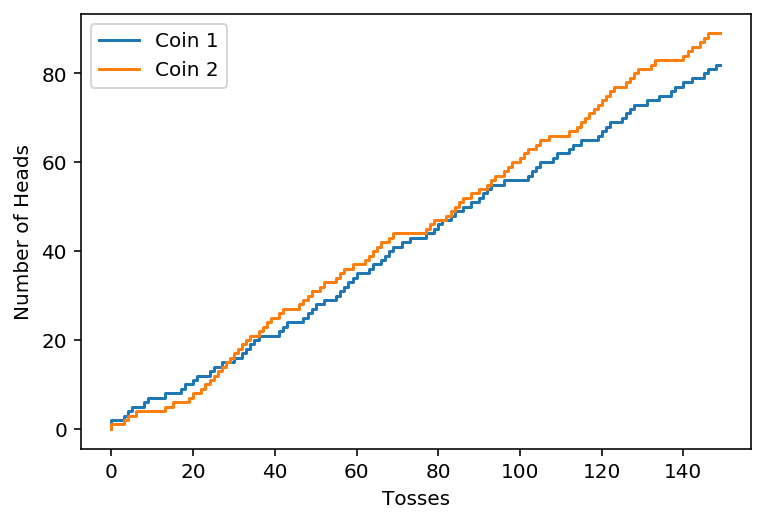

In [540]:
plot_heads(coin1, coin2)

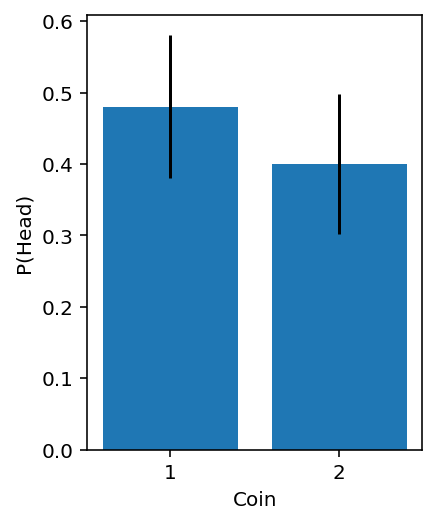

In [541]:
coin1, coin2 = toss_coins(
    p_coin_1 = 0.5,
    p_coin_2 = 0.6,
    n_throws = 25,
    seed     = 0
)
plot_p_head(coin1, coin2)

In [542]:
m1 = coin1.mean()
m2 = coin2.mean()
n  = len(coin1)
np.sqrt(m1 * (1 - m1) / n), np.sqrt(m2 * (1 - m2) / n)

(0.09991996797437437, 0.09797958971132711)

In [543]:
np.sqrt(.5 * (1 - .5) / n), np.sqrt(.6 * (1 - .6) / n)

(0.1, 0.09797958971132711)

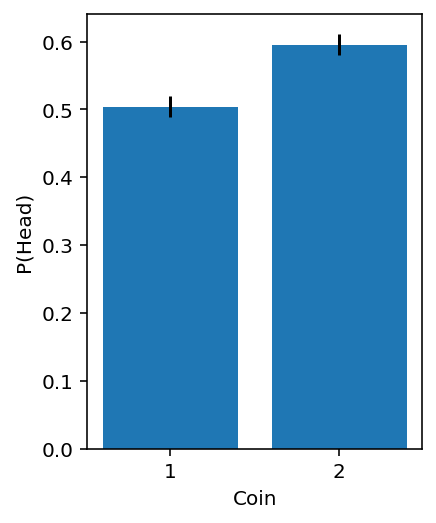

In [544]:
coin1, coin2 = toss_coins(
    p_coin_1 = 0.5,
    p_coin_2 = 0.6,
    n_throws = 1000,
    seed     = 0
)
plot_p_head(coin1, coin2)

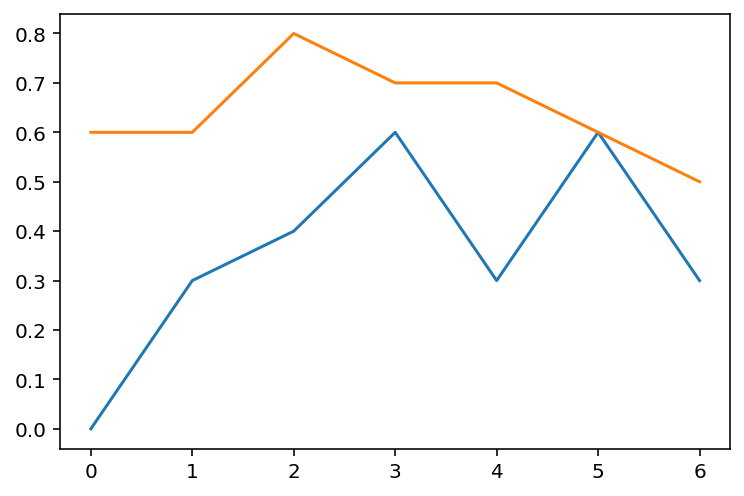

In [574]:
plt.figure(1)

means = repeated_experiment_means(
    p_coin_1  = 0.5,
    p_coin_2  = 0.6,
    n_throws  = 10,
    n_repeats = 7,
    seed      = 1
)

plt.plot(means)